In [1]:
# Dependencies and Setup
%matplotlib inline
%config InlineBackend.figure_format='svg'
from IPython.display import display,HTML
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from prettypandas import PrettyPandas
sns.set_style("ticks")
sns.set_context(context="notebook",font_scale=1)

In [2]:
# Read OKCupid Data file
df = pd.read_csv("profiles.csv")
print("The dataset contains {} records".format(len(df)))

# Show dataframe and print dataframe info
males = df[df["sex"]=="m"] # male users
females = df[df["sex"]=="f"] # female users
print("{} males ({:.1%}), {} females ({:.1%})".format(
    len(males),len(males)/len(df),
    len(females),len(females)/len(df)))

df = df.drop(['essay0', 'essay1', 'essay2', 
         'essay3', 'essay4', 'essay4', 
         'essay5', 'essay6', 'essay7', 
         'essay8', 'essay9'], axis=1)
df.head()

The dataset contains 59946 records
35829 males (59.8%), 24117 females (40.2%)


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
# Changed all -1 values in income to 0
df = df.replace({-1: None})
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,None,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,None,NaN,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,None,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
# Create dataframe that gets rid of rows where income is not reported
income = df[df.income.notna()]
income.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
11,28,average,mostly anything,socially,never,graduated from college/university,white,72.0,40000,banking / financial / real estate,...,"daly city, california",NaN,straight,likes cats,christianity and very serious about it,m,leo but it doesn&rsquo;t matter,no,"english (fluently), sign language (poorly)",seeing someone
13,30,skinny,mostly anything,socially,never,graduated from high school,white,66.0,30000,sales / marketing / biz dev,...,"san francisco, california",NaN,straight,has dogs and likes cats,christianity but not too serious about it,f,NaN,no,english,single
14,29,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62.0,50000,other,...,"san leandro, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,catholicism,f,taurus,no,english,single


In [5]:
#TaTi 
# Create a limited job dataframe to reduce job groups with less than 1000 respondents
education_df_income = income
education_df = education_df_income
education_df['New_ID'] = education_df.index
education_replaced = education_df.replace({'working on college/university':'High school graduate',
                            'working on space camp':None,
                            'graduated from masters program':'Master degree',
                            'graduated from college/university':'Bachelor degree',
                            'working on two-year college':'Some college, no degree',
                            'nan':None,
                            'graduated from high school':'High school graduate',
                            'working on masters program':'Bachelor degree',
                            'graduated from space camp':None,
                            'college/university':'Bachelor degree',
                            'dropped out of space camp':None,
                            'graduated from ph.d program':'Doctoral degree',
                            'graduated from law school':'Associate degree',
                            'working on ph.d program':'Bachelor degree',
                            'two-year college':'Some college, no degree',
                            'graduated from two-year college':'Some college, no degree',
                            'working on med school':'High school graduate',
                            'dropped out of college/university':'Some college, no degree',
                            'space camp':None,
                            'graduated from med school':'Associate degree',
                            'dropped out of high school':'No high school',
                            'working on high school':'No high school',
                            'masters program':'Master degree',
                            'dropped out of ph.d program':'Bachelor degree',
                            'dropped out of two-year college':'Some college, no degree',
                            'dropped out of med school':'High school graduate',
                            'high school':'High school graduate',
                            'working on law school':'High school graduate',
                            'law school':'Associate degree',
                            'dropped out of masters program':'Bachelor degree',
                            'ph.d program':'Doctoral degree',
                            'dropped out of law school':'High school graduate',
                            'med school':'Associate degree'
                            })
education_replaced = education_replaced[education_replaced.education.notna()]
#education_replaced['education'].unique()
education_replaced.groupby(['education']).aggregate({'New_ID': 'count'})
#education_replaced.head()
#len(education_replaced)
education_replaced.filter(like='No high school')  
education_replaced.head()
#education_replaced.to_csv('education_replaced.csv', sep=',')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,New_ID
3,23,thin,vegetarian,socially,NaN,High school graduate,white,71.0,20000,student,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3
11,28,average,mostly anything,socially,never,Bachelor degree,white,72.0,40000,banking / financial / real estate,...,NaN,straight,likes cats,christianity and very serious about it,m,leo but it doesn&rsquo;t matter,no,"english (fluently), sign language (poorly)",seeing someone,11
13,30,skinny,mostly anything,socially,never,High school graduate,white,66.0,30000,sales / marketing / biz dev,...,NaN,straight,has dogs and likes cats,christianity but not too serious about it,f,NaN,no,english,single,13
14,29,thin,mostly anything,socially,never,High school graduate,"hispanic / latin, white",62.0,50000,other,...,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,catholicism,f,taurus,no,english,single,14
43,40,fit,NaN,socially,NaN,Bachelor degree,white,71.0,60000,construction / craftsmanship,...,doesn&rsquo;t have kids,straight,likes dogs,agnosticism but not too serious about it,m,gemini and it&rsquo;s fun to think about,no,"english (okay), french (poorly), spanish (poor...",single,43


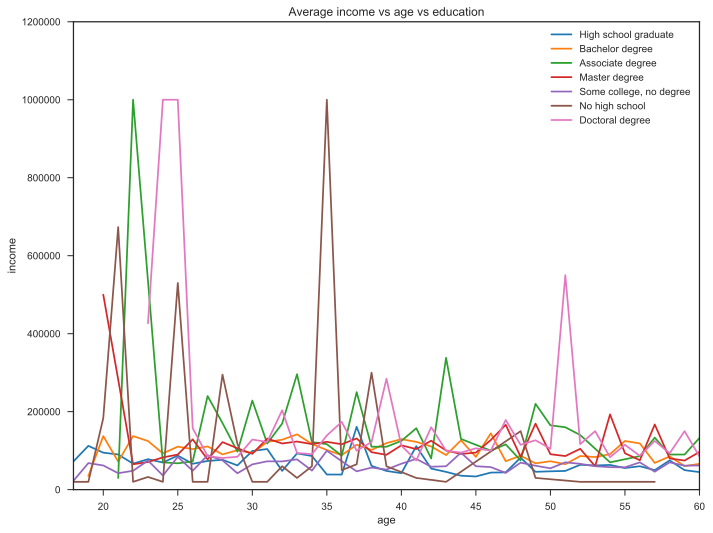

In [6]:
#TaTi 
#Average income vs age vs education
education_df_plot=education_replaced.groupby(["education","age"])["income"].mean()
fig,ax1=plt.subplots(figsize=(10,7.5))
for educations in education_replaced["education"].unique():
    ax1.plot(education_df_plot[educations], label=educations)
ax1.legend()
ax1.set_xlim(18,60)
ax1.set_ylim(0,1200000)
ax1.set(title="Average income vs age vs education",
        ylabel="income",
        xlabel="age");
fig.tight_layout()


In [7]:
#TaTi
# Create a limited job dataframe to reduce job groups with less than 1000 respondents
jobs_df_income = income
jobs_df = jobs_df_income
jobs_df['New_ID'] = jobs_df.index
#jobs_df = jobs_df.groupby(['job']).aggregate({'New_ID': 'count'})
jobs_replaced = jobs_df.replace({'nan': None, 
                             'rather not say': None,
                             'other': None, 
                             'clerical / administrative': None,
                             'military': None,
                             'political / government': None,
                             'retired': None,
                             'transportation':None, 
                             'unemployed': None,
                            })
jobs_replaced = jobs_replaced[jobs_replaced.job.notna()]
jobs_replaced.groupby(['job']).aggregate({'New_ID': 'count'})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,New_ID
job,
artistic / musical / writer,1042
banking / financial / real estate,365
computer / hardware / software,1156
construction / craftsmanship,357
education / academia,738
entertainment / media,461
executive / management,557
hospitality / travel,345
law / legal services,217


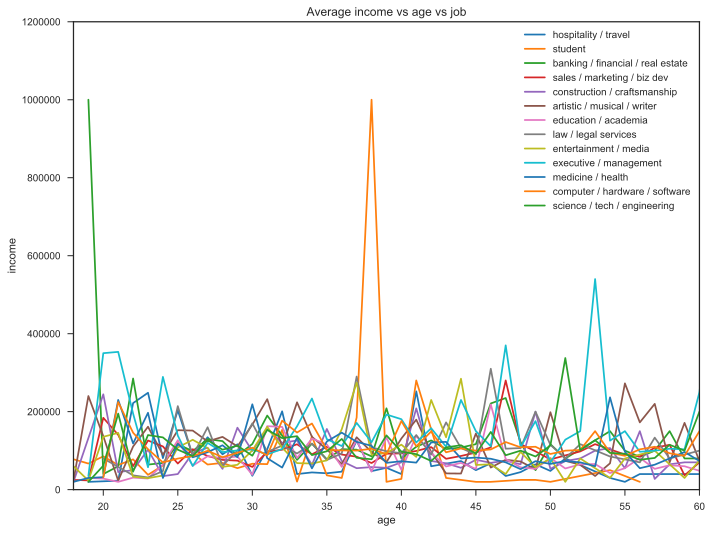

In [9]:
#TaTi 
#Average income vs age vs jobs
jobs_df_plot=jobs_replaced.groupby(["job","age"])["income"].mean()
fig,ax2=plt.subplots(figsize=(10,7.5))
for jobs in jobs_replaced["job"].unique():
    ax2.plot(jobs_df_plot[jobs], label=jobs)
ax2.legend()
ax2.set_xlim(18,60)
ax2.set_ylim(0,1200000)
ax2.set(title="Average income vs age vs job",
        ylabel="income",
        xlabel="age");
fig.tight_layout()

                           job  age         income
0  artistic / musical / writer   18   23333.333333
1  artistic / musical / writer   19  240000.000000
2  artistic / musical / writer   20  137142.857143
3  artistic / musical / writer   21   23043.478261
4  artistic / musical / writer   22  110555.555556


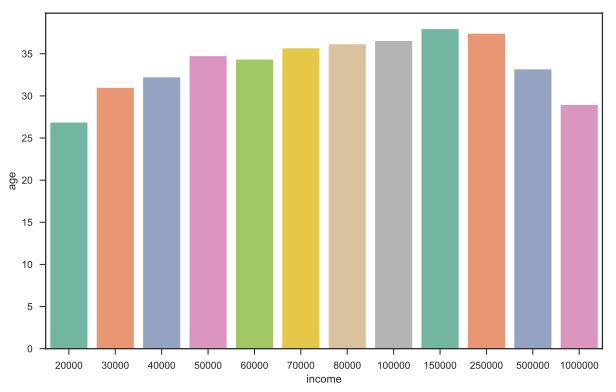

In [10]:
#TaTi
#get average income for different jobs
plt.figure(figsize=(10,10*0.6186))
temp_df = jobs_replaced.groupby(["job","age"]).agg({"income":"mean"}).reset_index()
print(temp_df.head())
sns.barplot(x = "income", # required
            y="age", # required
            data = education_replaced, # required
            #hue = "clarity", # optional: choose clarity for color
            dodge = False, # optional: stacked bar, defult to True
            palette = "Set2", # optional: choose color palette
           ci = None) # turn off error bars
plt.show()

          education  age     income
0  Associate degree   21    30000.0
1  Associate degree   22  1000000.0
2  Associate degree   24    70000.0
3  Associate degree   25    67500.0
4  Associate degree   26    72500.0


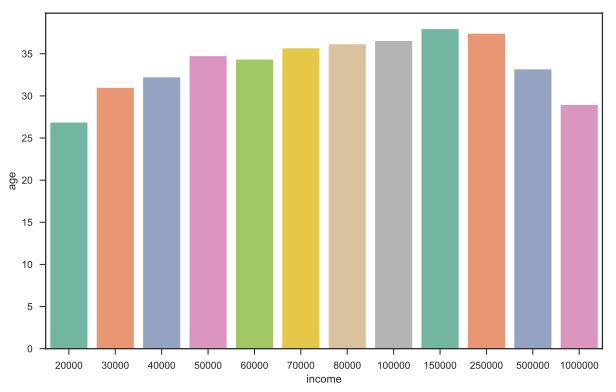

In [11]:
#TaTi
#get average income for different Education
plt.figure(figsize=(10,10*0.6186))
temp_df = education_replaced.groupby(["education","age"]).agg({"income":"mean"}).reset_index()
print(temp_df.head())
sns.barplot(x = "income", # required
            y="age", # required
            data = education_replaced, # required
            #hue = "clarity", # optional: choose clarity for color
            dodge = False, # optional: stacked bar, defult to True
            palette = "Set2", # optional: choose color palette
           ci = None) # turn off error bars
plt.show()

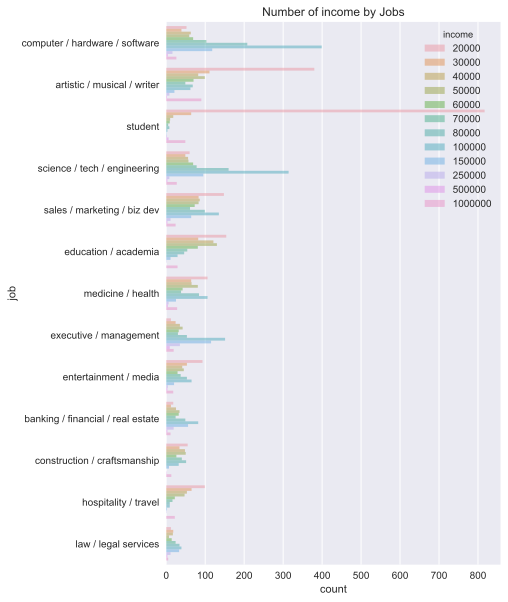

In [16]:
#TaTi
fig,ax=plt.subplots(figsize=(6,10))
sns.countplot(y="job",hue="income",
              order=jobs_replaced["job"].value_counts().sort_values(ascending=False).index,
              data=jobs_replaced,alpha=0.5,ax=ax);
ax.set_title("Number of income by Jobs")
sns.despine(ax=ax)

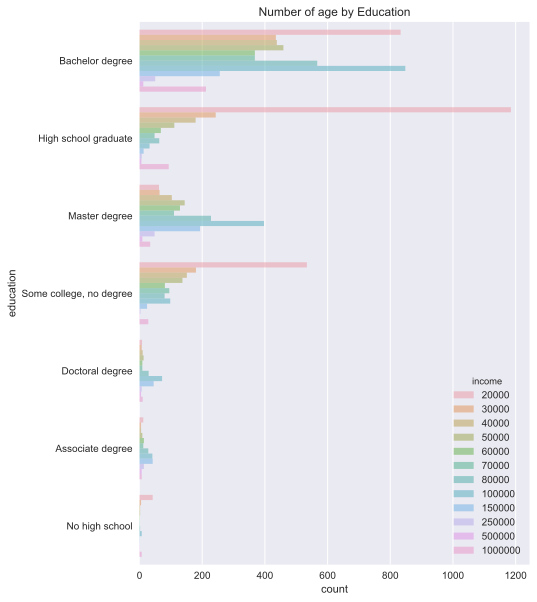

In [15]:
#TaTi
fig,ax=plt.subplots(figsize=(7,10))
sns.countplot(y="education",hue="income",
              order=education_replaced["education"].value_counts().sort_values(ascending=False).index,
              data=education_replaced,alpha=0.5,ax=ax);
ax.set_title("Number of age by Education")
sns.despine(ax=ax)

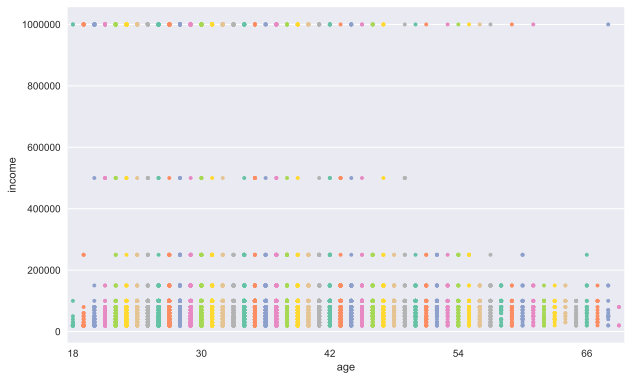

In [14]:
#TaTi
sns.set_style("darkgrid") #optional: set canvas style
plt.figure(figsize=(10,10*0.6186))
scatter_sns = sns.stripplot(x = "age", # required: x axis data
              y = "income", # required: y axis data
              data = income, # required
              #hue = "cut", # optional: use "cut" as color for points
              palette = "Set2", #optional: pick color palette,
              size = 4, #optional: size for makers, default to 5
              )
for ind, label in enumerate(scatter_sns.get_xticklabels()):
    if ind % 12 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()


# Jobs Clean-Up

In [5]:
jobs_df = df
jobs_df['job'].unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [11]:
# Clean up job column
jobs_df = jobs_df.replace({'nan': None, 'rather not say': None,'other': None, '' })
jobs_df = jobs_df[jobs_df.job.notna()]
jobs_df['job'].unique()

array(['transportation', 'hospitality / travel', 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'political / government',
       'law / legal services', 'unemployed', 'military', 'retired'],
      dtype=object)

In [43]:
# Create a limited job dataframe to reduce job groups with less than 1000 respondents
jobs_count = jobs_df
jobs_count['New_ID'] = jobs_count.index
jobs_count = jobs_count.groupby(['job']).aggregate({'New_ID': 'count'})
jobs_lite = jobs_df.replace({'nan': None, 
                             'rather not say': None,
                             'other': None, 
                             'clerical / administrative': None,
                             'military': None,
                             'political / government': None,
                             'retired': None,
                             'transportation':None, 
                             'unemployed': None,
                            })
jobs_lite = jobs_lite[jobs_lite.job.notna()]
jobs_lite['job'].unique()

array(['hospitality / travel', 'student', 'artistic / musical / writer',
       'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'construction / craftsmanship',
       'law / legal services'], dtype=object)

# Religion & Job/Occupation: Cephra

In [5]:
len(income)

11504

In [6]:
# Create database for religion analysis
religion_df = df
religion_df['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [7]:
# Clean up religion column
rel_vals_to_replace = {'agnosticism and very serious about it': 'agnosticism', 
                   'agnosticism but not too serious about it': 'agnosticism',
                   'agnosticism and somewhat serious about it': 'agnosticism',
                   'agnosticism and laughing about it': 'agnosticism',
                   'atheism and laughing about it': 'atheism',
                   'atheism and somewhat serious about it': 'atheism',
                   'atheism but not too serious about it': 'atheism',
                   'atheism and very serious about it': 'atheism',
                   'buddhism but not too serious about it': 'buddhism',
                   'buddhism and somewhat serious about it': 'buddhism',
                   'buddhism and very serious about it': 'buddhism',
                   'buddhism and laughing about it': 'buddhism',
                   'christianity and very serious about it': 'christianity',
                   'christianity but not too serious about it': 'christianity',
                   'christianity and somewhat serious about it': 'christianity',
                   'christianity and laughing about it': 'christianity',
                   'catholicism but not too serious about it': 'catholicism',
                   'catholicism and somewhat serious about it': 'catholicism',
                   'catholicism and very serious about it': 'catholicism',
                   'catholicism and laughing about it': 'catholicism',
                   'other and somewhat serious about it': 'other',
                   'other and very serious about it': 'other',
                   'other but not too serious about it': 'other',
                   'other and laughing about it': 'other',
                   'judaism and laughing about it': 'judaism',
                   'judaism and very serious about it': 'judaism',
                   'judaism and somewhat serious about it': 'judaism',
                   'judaism but not too serious about it': 'judaism',
                   'hinduism and somewhat serious about it': 'hinduism',
                   'hinduism and very serious about it': 'hinduism',
                   'hinduism but not too serious about it': 'hinduism',
                   'hinduism and laughing about it': 'hinduism',
                   'islam but not too serious about it': 'islam',
                   'islam and laughing about it': 'islam',
                   'islam and somewhat serious about it': 'islam',
                   'islam and very serious about it': 'islam',
                  }
religion_df['religion'] = religion_df['religion'].map(rel_vals_to_replace)
religion_df.religion.unique()

array(['agnosticism', nan, 'christianity', 'atheism', 'catholicism',
       'buddhism', 'other', 'judaism', 'hinduism', 'islam'], dtype=object)

In [8]:
# Drop all rows that have none for religion
religion_df = df.replace({'NaN': None})
religion_df = df[df.religion.notna()]
religion_df

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,None,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,white,67.0,None,NaN,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,37,athletic,mostly anything,not at all,never,working on two-year college,white,65.0,None,student,...,"san mateo, california",NaN,straight,likes dogs and likes cats,atheism,m,cancer but it doesn&rsquo;t matter,no,english (fluently),single
11,28,average,mostly anything,socially,never,graduated from college/university,white,72.0,40000,banking / financial / real estate,...,"daly city, california",NaN,straight,likes cats,christianity,m,leo but it doesn&rsquo;t matter,no,"english (fluently), sign language (poorly)",seeing someone
13,30,skinny,mostly anything,socially,never,graduated from high school,white,66.0,30000,sales / marketing / biz dev,...,"san francisco, california",NaN,straight,has dogs and likes cats,christianity,f,NaN,no,english,single
15,39,fit,strictly anything,socially,NaN,graduated from college/university,white,65.0,None,medicine / health,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and has cats,atheism,f,aquarius but it doesn&rsquo;t matter,no,"english (fluently), spanish (okay)",single
19,33,athletic,mostly anything,socially,never,graduated from masters program,white,72.0,None,science / tech / engineering,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,catholicism,m,pisces and it&rsquo;s fun to think about,no,english (fluently),single
21,22,athletic,NaN,socially,never,working on college/university,NaN,67.0,None,student,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,catholicism,f,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",single
22,30,fit,mostly anything,socially,never,graduated from college/university,white,69.0,None,executive / management,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,sagittarius but it doesn&rsquo;t matter,no,"english, spanish (poorly)",single


In [9]:
# Create dataframe comparing religion to jobs
rel_v_job = religion_df.groupby(['religion', 'job']).count().unstack(level=1)
rel_v_job

age                                    \
job          artistic / musical / writer banking / financial / real estate   
religion                                                                     
agnosticism                        513.0                             166.0   
atheism                            409.0                             106.0   
buddhism                           180.0                              48.0   
catholicism                        166.0                             191.0   
christianity                       182.0                             206.0   
hinduism                            15.0                              22.0   
islam                                7.0                               3.0   
judaism                            181.0                              93.0   
other                              639.0                             108.0   

                                                                       \
job          clerical / administrative computer / hardware / software   
religion                                                                
agnosticism                       87.0                          726.0   
atheism                           64.0                          764.0   
buddhism                          22.0                          119.0   
catholicism                      100.0                          219.0   
christianity                      69.0                          217.0   
hinduism                           1.0                           68.0   
islam                              1.0                            7.0   
judaism                           18.0                          205.0   
other                             74.0                          345.0   

                                                                \
job          construction / craftsmanship education / academia   
religion                                                         
agnosticism                          83.0                341.0   
atheism                              59.0                236.0   
buddhism                             29.0                136.0   
catholicism                          83.0                260.0   
christianity                        103.0                218.0   
hinduism                              NaN                  9.0   
islam                                 2.0                  1.0   
judaism                              15.0                214.0   
other                               137.0                297.0   

                                                           \
job          entertainment / media executive / management   
religion                                                    
agnosticism                  304.0                  248.0   
atheism                      190.0                  143.0   
buddhism                      52.0                   68.0   
catholicism                  135.0                  158.0   
christianity                 129.0                  200.0   
hinduism                      10.0                   21.0   
islam                          5.0                    4.0   
judaism                      113.0                  118.0   
other                        192.0                  195.0   

                                                          ...       status  \
job          hospitality / travel law / legal services    ...     military   
religion                                                  ...                
agnosticism                 162.0                144.0    ...         15.0   
atheism                      85.0                 93.0    ...         12.0   
buddhism                     22.0                 29.0    ...          5.0   
catholicism                 114.0                111.0    ...         23.0   
christianity                 76.0                 95.0    ...         40.0   
hinduism                      3.0                  8.0    ...          Na

# Astrological Sign & Job/Occupation: Cephra

In [10]:
sign_df = df
sign_df['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

In [11]:
# Clean up astrology ('sign') column
sign_vals_to_replace = {'pisces but it doesn&rsquo;t matter':'pisces',
                       'gemini but it doesn&rsquo;t matter': 'gemini',
                       'cancer but it doesn&rsquo;t matter': 'cancer',
                       'leo but it doesn&rsquo;t matter': 'leo',
                       'aquarius but it doesn&rsquo;t matter': 'aquarius',
                       'aries and it&rsquo;s fun to think about': 'aries',
                       'libra but it doesn&rsquo;t matter': 'libra',
                       'pisces and it&rsquo;s fun to think about': 'pisces',
                       'taurus but it doesn&rsquo;t matter': 'taurus',
                       'sagittarius but it doesn&rsquo;t matter': 'sagittarius',
                       'scorpio and it matters a lot': 'scorpio',
                       'gemini and it&rsquo;s fun to think about': 'gemini',
                       'leo and it&rsquo;s fun to think about': 'leo',
                       'cancer and it&rsquo;s fun to think about': 'cancer',
                       'libra and it&rsquo;s fun to think about': 'libra',
                       'aquarius and it&rsquo;s fun to think about': 'aquarius',
                       'virgo but it doesn&rsquo;t matter': 'virgo',
                       'scorpio and it&rsquo;s fun to think about': 'scorpio',
                       'capricorn but it doesn&rsquo;t matter': 'capricorn',
                       'capricorn and it&rsquo;s fun to think about': 'capricorn',
                       'aries but it doesn&rsquo;t matter': 'aries',
                       'scorpio but it doesn&rsquo;t matter': 'scorpio',
                       'sagittarius and it&rsquo;s fun to think about': 'sagittarius',
                       'libra and it matters a lot': 'libra',
                       'taurus and it&rsquo;s fun to think about': 'taurus',
                       'leo and it matters a lot': 'leo',
                       'virgo and it&rsquo;s fun to think about': 'virgo',
                       'cancer and it matters a lot': 'cancer',
                       'pisces and it matters a lot': 'pisces',
                       'aries and it matters a lot': 'aries',
                       'capricorn and it matters a lot': 'capricorn',
                       'aquarius and it matters a lot': 'aquarius',
                       'sagittarius and it matters a lot': 'sagittarius',
                       'gemini and it matters a lot': 'gemini',
                       'taurus and it matters a lot': 'taurus',
                       'virgo and it matters a lot': 'virgo'
                  }
sign_df['sign'] = sign_df['sign'].map(sign_vals_to_replace)
sign_df.sign.unique()

array([nan, 'pisces', 'gemini', 'cancer', 'leo', 'aquarius', 'aries',
       'libra', 'taurus', 'sagittarius', 'scorpio', 'virgo', 'capricorn'],
      dtype=object)

In [12]:
# Create dataframe comparing astrology sign to jobs
astro_v_job = sign_df.groupby(['sign', 'job']).count().unstack(level=1)
astro_v_job

age                                    \
job         artistic / musical / writer banking / financial / real estate   
sign                                                                        
aquarius                            228                                84   
aries                               249                               104   
cancer                              262                               111   
capricorn                           228                               103   
gemini                              292                               112   
leo                                 261                               127   
libra                               259                               107   
pisces                              231                               112   
sagittarius                         251                               101   
scorpio                             277                               109   
taurus                              220                               114   
virgo                               230                                99   

                                                                      \
job         clerical / administrative computer / hardware / software   
sign                                                                   
aquarius                           41                            266   
aries                              41                            237   
cancer                             52                            265   
capricorn                          38                            212   
gemini                             52                            296   
leo                                54                            273   
libra                              52                            260   
pisces                             50                            270   
sagittarius                        47                            251   
scorpio                            51                            277   
taurus                             44                            254   
virgo                              57                            278   

                                                               \
job         construction / craftsmanship education / academia   
sign                                                            
aquarius                              48                  183   
aries                                 52                  207   
cancer                                67                  222   
capricorn                             45                  169   
gemini                                58                  214   
leo                                   58                  174   
libra                                 50                  187   
pisces                                36                  206   
sagittarius                           52                  181   
scorpio                               57                  202   
taurus                                74                  195   
virgo                                 46                  172   

                                                                               \
job         entertainment / media executive / management hospitality / travel   
sign                                                                            
aquarius                       98                    121                   72   
aries                         134                    119                   70   
cancer                        135                    136                   71   
capricorn                     109                    119                   69   
gemini                        144                    118                   96   
leo                           144                    132                   84   
libra                         133                    134                   88   
pisces       

# Offspring & Job/Occupation: Cephra

In [13]:
offs_df = df
offs_df['offspring'].unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [14]:
# Clean up offspring column
offs_vals_to_replace = {'doesn&rsquo;t have kids, but might want them': 'Maybe',
                        'doesn&rsquo;t want kids': 'No',
                        'doesn&rsquo;t have kids, but wants them': "Yes",
                        'doesn&rsquo;t have kids': 'Neutral', 
                        'wants kids': "Yes", 
                        'has a kid': "1 Child",
                        'has kids': "Multiple Children",
                        'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 'No',
                        'has kids, but doesn&rsquo;t want more': "Multiple Children",
                        'has a kid, but doesn&rsquo;t want more': "1 Child",
                        'has a kid, and wants more': '1 Child', 
                        'has kids, and might want more': 'Multiple Children',
                        'might want kids': 'Maybe', 
                        'has a kid, and might want more': '1 Child',
                        'has kids, and wants more': 'Multiple Children',
                          }
offs_df['offspring'] = offs_df['offspring'].map(offs_vals_to_replace)
offs_df.offspring.unique()

array(['Maybe', nan, 'No', 'Yes', 'Neutral', '1 Child',
       'Multiple Children'], dtype=object)

In [15]:
# Drop all rows that have none for offspring
offs_df = offs_df.replace({'NaN': None})
offs_df = offs_df[offs_df.offspring.notna()]
offs_df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,NaN,transportation,...,"south san francisco, california",Maybe,straight,likes dogs and likes cats,agnosticism,m,NaN,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,...,"oakland, california",Maybe,straight,likes dogs and likes cats,agnosticism,m,NaN,no,"english (fluently), spanish (poorly), french (...",single
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,...,"berkeley, california",No,straight,likes cats,NaN,m,NaN,no,"english, german (poorly)",single
5,29,average,mostly anything,socially,NaN,graduated from college/university,white,67.0,NaN,computer / hardware / software,...,"san francisco, california",Maybe,straight,likes cats,NaN,m,NaN,no,"english (fluently), chinese (okay)",single
7,31,average,mostly anything,socially,never,graduated from college/university,white,65.0,NaN,artistic / musical / writer,...,"san francisco, california",Yes,straight,likes dogs and likes cats,NaN,f,NaN,no,"english, spanish (okay)",single


In [43]:
## Ryan's section


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:46: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


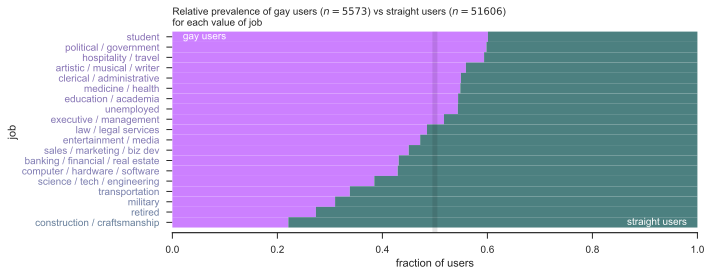

In [18]:
### sexual orientation vs. job
import math

# Define visualization function
def compare_prevalence(series,g1,g2,g1name,g2name,g1color,g2color,ax):
    
    # for each categorical value represented in series, number of users in group g1 which have this value
    g1n=series.loc[g1].value_counts()
    # for each categorical value represented in series, number of users in group g2 which have this value
    g2n=series.loc[g2].value_counts()
    
    # join the two series in a single dataframe, filling 0 where indices don't match
    # (e.g. if a value represented in g1 did never appear in g2)
    df=pd.concat({"g1n":g1n,"g2n":g2n},axis=1).fillna(0)
    # df has one row for every distinct value of series in the union of g1 and g2
    
    # normalize the data
    df["g1f"]=df["g1n"]/(df["g1n"].sum()) # fraction of g1 users with each categorical value
    df["g2f"]=df["g2n"]/(df["g2n"].sum()) # fraction of g2 users with each categorical value
    
    assert(math.isclose(df["g1f"].sum(),1)) 
    assert(math.isclose(df["g2f"].sum(),1))
    
    # for each row of df, we now compute how frequent the value was in g1 compared to the frequency it had in g2.
    df["frac12"]=df["g1f"]/(df["g1f"]+df["g2f"])
    # we expect df["frac12"] to be 0.5 for values that were equally frequent in g1 and g2 (note that this does not depend on the size of g1 and g2)
    # we expect df["frac12"] to be 0 for values that were only seen in g2 and never seen in g1
    # we expect df["frac12"] to be 1 for values that were only seen in g1 and never seen in g2
    
    df=df[(df["g1n"]+df["g2n"])>=50] # exclude values which are too rare
    df=df.sort_values("frac12")
    
    # Draw the left bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"],
                left=0,
                height=1,
                align="center",
                color=g1color,alpha=1)
    # Draw the right bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"]-1,
                left=1,
                height=1,
                align="center",
                color=g2color,alpha=1)
    
    # Draw a faint vertical line for x=0.5
    ax.axvline(x=0.5,color="k",alpha=0.1,linewidth=5)
    ax.set(xlim=[0,1],
           ylim=[-1,len(df)-0.5],
           yticks=range(len(df)),
           yticklabels=df.index,
           xlabel="fraction of users",
           ylabel=series.name)
    
    ax.set_title("Relative prevalence of {} ($n={}$) vs {} ($n={}$)\nfor each value of {}".format(
                g1name,g1.sum(),g2name,g2.sum(),series.name),
                loc="left",fontdict={"fontsize":"medium"})
    ax.text(0.02,len(df)-1,g1name,verticalalignment="center",horizontalalignment="left",size="medium",color="w")
    ax.text(0.98,0,g2name,verticalalignment="center",horizontalalignment="right",size="medium",color="w")

    def color_for_frac(f):
        # Blend g1color and g2color according to f (convex linear combination):
        # 0 returns g1color, 1 returns g2color)
        ret=np.array(g1color)*f+np.array(g2color)*(1-f)
        if(np.linalg.norm(ret)>1):          # If the resulting rgb color is too bright for text,
            ret=(ret/np.linalg.norm(ret))*1 # rescale its brightness to dark (but keep hue)
        return ret
        
    for i,tl in enumerate(plt.gca().get_yticklabels()):
        tl.set_color(color_for_frac(df["frac12"].iloc[i]))
        
    sns.despine(ax=ax,left=True)

# Apply visualization function 
fig,ax = plt.subplots(figsize=(10,4))
compare_prevalence(
    series=jobs_df["job"],                          # Which categorical attribute?
    g1=df["orientation"]=="gay",      g2=df["orientation"]=="straight",        # Definition of the two groups
    g1name="gay users",   g2name="straight users",   # Names of the two groups
    g1color=[0.8,0.5,1.0], g2color=[0.3,0.5,0.5],   # Colors for the two groups
    ax=ax)
fig.tight_layout()

# Substance Usage: Ryan

In [22]:
# Create a drugs dataframe 
drugs_df = df
drugs_df['drugs'].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [23]:
# Clean up drugs column
drugs_vals_to_replace = {'sometimes': 'Yes',
                        'often': 'Yes',
                        'never': 'No',
                          }
drugs_df['drugs'] = drugs_df['drugs'].map(drugs_vals_to_replace)

array(['No', 'Yes', nan], dtype=object)

In [24]:
# Drop rows that have nan
drugs_df = drugs_df.replace({'nan': None})
drugs_df = drugs_df[drugs_df.drugs.notna()]

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,No,working on college/university,"asian, white",75.0,NaN,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,Yes,working on space camp,white,70.0,80000.0,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
4,29,athletic,NaN,socially,No,graduated from college/university,"asian, black, other",66.0,NaN,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
6,32,fit,strictly anything,socially,No,graduated from college/university,"white, other",65.0,NaN,NaN,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31,average,mostly anything,socially,No,graduated from college/university,white,65.0,NaN,artistic / musical / writer,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single


In [28]:
len(drugs_df.loc[drugs_df['drugs']=="No"])

37724

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:36: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:43: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


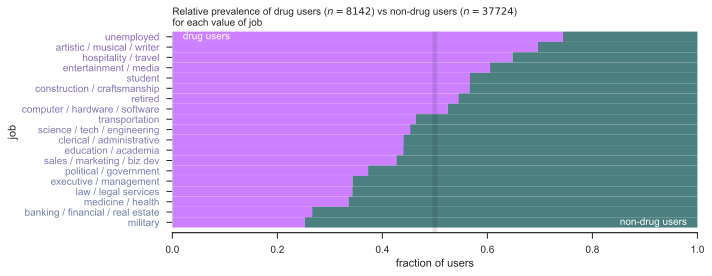

In [27]:
# Define visualization function
def compare_prevalence(series,g1,g2,g1name,g2name,g1color,g2color,ax):
    
    # for each categorical value represented in series, number of users in group g1 which have this value
    g1n=series.loc[g1].value_counts()
    # for each categorical value represented in series, number of users in group g2 which have this value
    g2n=series.loc[g2].value_counts()
    
    # join the two series in a single dataframe, filling 0 where indices don't match
    # (e.g. if a value represented in g1 did never appear in g2)
    df=pd.concat({"g1n":g1n,"g2n":g2n},axis=1).fillna(0)
    # df has one row for every distinct value of series in the union of g1 and g2
    
    # normalize the data
    df["g1f"]=df["g1n"]/(df["g1n"].sum()) # fraction of g1 users with each categorical value
    df["g2f"]=df["g2n"]/(df["g2n"].sum()) # fraction of g2 users with each categorical value
    
    assert(math.isclose(df["g1f"].sum(),1)) 
    assert(math.isclose(df["g2f"].sum(),1))
    
    # for each row of df, we now compute how frequent the value was in g1 compared to the frequency it had in g2.
    df["frac12"]=df["g1f"]/(df["g1f"]+df["g2f"])
    # we expect df["frac12"] to be 0.5 for values that were equally frequent in g1 and g2 (note that this does not depend on the size of g1 and g2)
    # we expect df["frac12"] to be 0 for values that were only seen in g2 and never seen in g1
    # we expect df["frac12"] to be 1 for values that were only seen in g1 and never seen in g2
    
    df=df[(df["g1n"]+df["g2n"])>=50] # exclude values which are too rare
    df=df.sort_values("frac12")
    
    # Draw the left bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"],
                left=0,
                height=1,
                align="center",
                color=g1color,alpha=1)
    # Draw the right bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"]-1,
                left=1,
                height=1,
                align="center",
                color=g2color,alpha=1)
    
    # Draw a faint vertical line for x=0.5
    ax.axvline(x=0.5,color="k",alpha=0.1,linewidth=5)
    ax.set(xlim=[0,1],
           ylim=[-1,len(df)-0.5],
           yticks=range(len(df)),
           yticklabels=df.index,
           xlabel="fraction of users",
           ylabel=series.name)
    
    ax.set_title("Relative prevalence of {} ($n={}$) vs {} ($n={}$)\nfor each value of {}".format(
                g1name,g1.sum(),g2name,g2.sum(),series.name),
                loc="left",fontdict={"fontsize":"medium"})
    ax.text(0.02,len(df)-1,g1name,verticalalignment="center",horizontalalignment="left",size="medium",color="w")
    ax.text(0.98,0,g2name,verticalalignment="center",horizontalalignment="right",size="medium",color="w")

    def color_for_frac(f):
        # Blend g1color and g2color according to f (convex linear combination):
        # 0 returns g1color, 1 returns g2color)
        ret=np.array(g1color)*f+np.array(g2color)*(1-f)
        if(np.linalg.norm(ret)>1):          # If the resulting rgb color is too bright for text,
            ret=(ret/np.linalg.norm(ret))*1 # rescale its brightness to dark (but keep hue)
        return ret
        
    for i,tl in enumerate(plt.gca().get_yticklabels()):
        tl.set_color(color_for_frac(df["frac12"].iloc[i]))
        
    sns.despine(ax=ax,left=True)

# Apply visualization function 
fig,ax = plt.subplots(figsize=(10,4))
compare_prevalence(
    series=jobs_df["job"],                          # Which categorical attribute?
    g1=df["drugs"]=="Yes",      g2=df["drugs"]=="No",        # Definition of the two groups
    g1name="drug users",   g2name="non-drug users",   # Names of the two groups
    g1color=[0.8,0.5,1.0], g2color=[0.3,0.5,0.5],   # Colors for the two groups
    ax=ax)
fig.tight_layout()

# New Assignments for Team
 - Jarvis to focus on lat/lng & plotting geolocation (Geography)
 - Ryan to focus on jobs vs. drugs, drinks, smoking, sexual orientation (Substance Use)
 - Tati to focus on jobs vs. age, income, education (Economics)
 - Cephra to focus on religion, astrological sign, offspring (Spiritual)

#age	body_type	diet	drinks	drugs	education	ethnicity	height	income	job	last_online	location	offspring	orientation	pets	religion	sex	sign	smokes	speaks	status


#age vs drinks vs drug
#age vs religion
#location vs sign
#age vs smoke
#height vs income
#income vs drinks vs drug
#income vs education
#body_type vs location
#ethnicity vs job or income
    


